# **The Sparks Foundation**

## **Task 5 : Exploratory Data Analysis - Sports**

Main Highlights:

1.Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League'

2.As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.

3.Suggest teams or players a company should endorse for its products.

Author : DISHA G RAO - #GRIPJAN21

In [84]:
#Importing the libraries
import math
import numpy as np
import pandas as pd
from scipy import stats
import os
import seaborn as sns
import matplotlib.pyplot as plt 

In [85]:
#loading the datset 
df = pd.read_csv('matches.csv')

In [125]:
df1 = pd.read_csv('deliveries.csv')

In [87]:
df.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [88]:
df.shape


(756, 18)

In [89]:
df1.shape

(179078, 21)

In [90]:
df.info

<bound method DataFrame.info of         id  season  ...         umpire2                  umpire3
0        1    2017  ...        NJ Llong                      NaN
1        2    2017  ...          S Ravi                      NaN
2        3    2017  ...       CK Nandan                      NaN
3        4    2017  ...   C Shamshuddin                      NaN
4        5    2017  ...             NaN                      NaN
..     ...     ...  ...             ...                      ...
751  11347    2019  ...        O Nandan                   S Ravi
752  11412    2019  ...     Nitin Menon                Ian Gould
753  11413    2019  ...             NaN                      NaN
754  11414    2019  ...  Bruce Oxenford  Chettithody Shamshuddin
755  11415    2019  ...       Ian Gould              Nigel Llong

[756 rows x 18 columns]>

In [91]:
df.dtypes #describes the data type 

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [173]:
df.count() #No of elelements with the specified value

id                 756
season             756
city               749
date               756
team1              756
team2              756
toss_winner        756
toss_decision      756
result             756
dl_applied         756
winner             752
win_by_runs        756
win_by_wickets     756
player_of_match    752
venue              756
umpire1            754
umpire2            754
umpire3            119
dtype: int64

In [174]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


## ANALYSIS OF THE DATASET

Matches in every season

In [93]:
for team in df['team1'].unique():
  print(team)

Sunrisers Hyderabad
Mumbai Indians
Gujarat Lions
Rising Pune Supergiant
Royal Challengers Bangalore
Kolkata Knight Riders
Delhi Daredevils
Kings XI Punjab
Chennai Super Kings
Rajasthan Royals
Deccan Chargers
Kochi Tuskers Kerala
Pune Warriors
Rising Pune Supergiants
Delhi Capitals


In [94]:
df["team2"] = df["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["team1"] = df["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["winner"] = df["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["toss_winner"] =df["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [95]:
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

### Match winning statistics

### Team won by Maximum Runs

In [96]:
df.iloc[df['win_by_runs'].idxmax()] 

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [97]:
df.iloc[df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

### Team won by maximum wickets

In [98]:
df.iloc[df['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [99]:

df.iloc[df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

### Team won by minimum runs

In [100]:
df.iloc[df[df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

### Team won by minimum wickets

In [101]:
df.iloc[df[df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

##### Mumbai Indians - Maximum runs and Minimum runs
##### Kolkata Knight Riders - Maximum and Minimum wickets

### Season with more number of *matches*

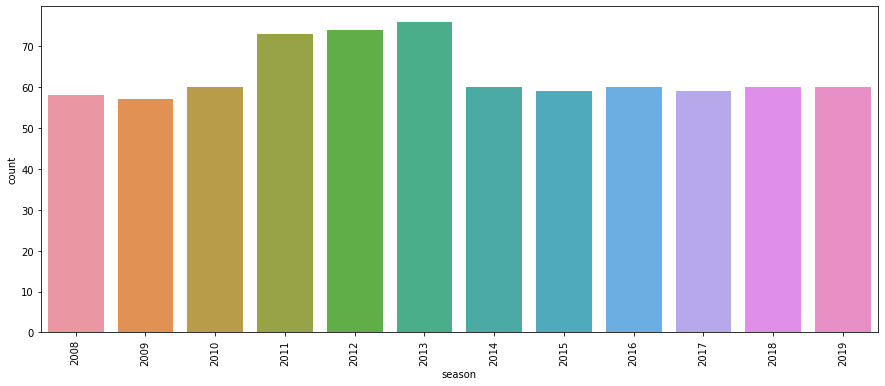

In [102]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'season' , data = df)
plt.xticks(rotation = 'vertical')
plt.show()

##### In 2013, there are more number of matches

#### Winning Team

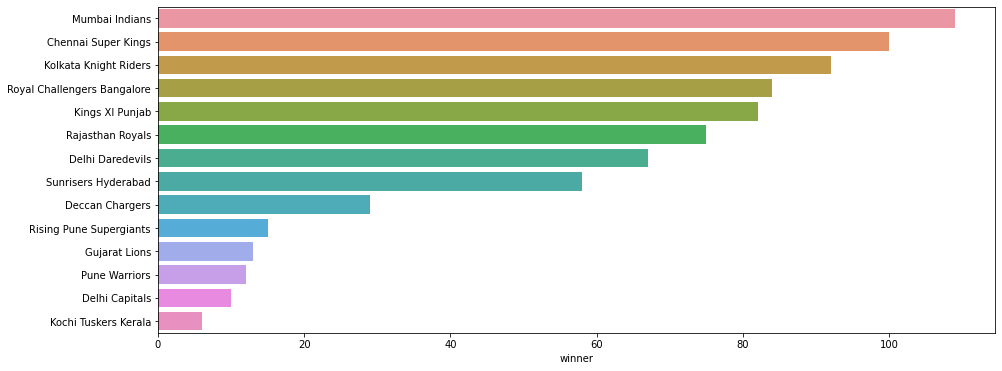

In [103]:
 plt.figure(figsize = (15,6))
data = df.winner.value_counts()
sns.barplot( y =data.index, x = data , orient='h')
plt.show()

### Top Player of the match

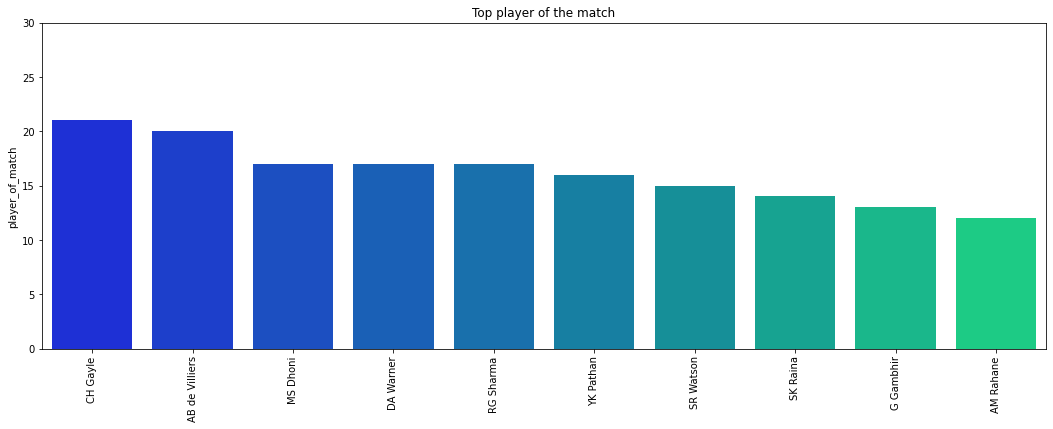

In [135]:
top_players = df.player_of_match.value_counts()[:10]
fig,ax = plt.subplots(figsize=(18,6))
ax.set_ylabel("Count")
ax.set_title ("Top player of the match")
ax.set_ylim([0,30])
plt.xticks(rotation = 'vertical')
top_players.plot.bar()
sns.barplot( x = top_players.index , y = top_players , orient = 'v',palette= 'winter')
plt.show()

##### Chris Gayle is the most successfull player in all the matches

### Number of matches in each venue

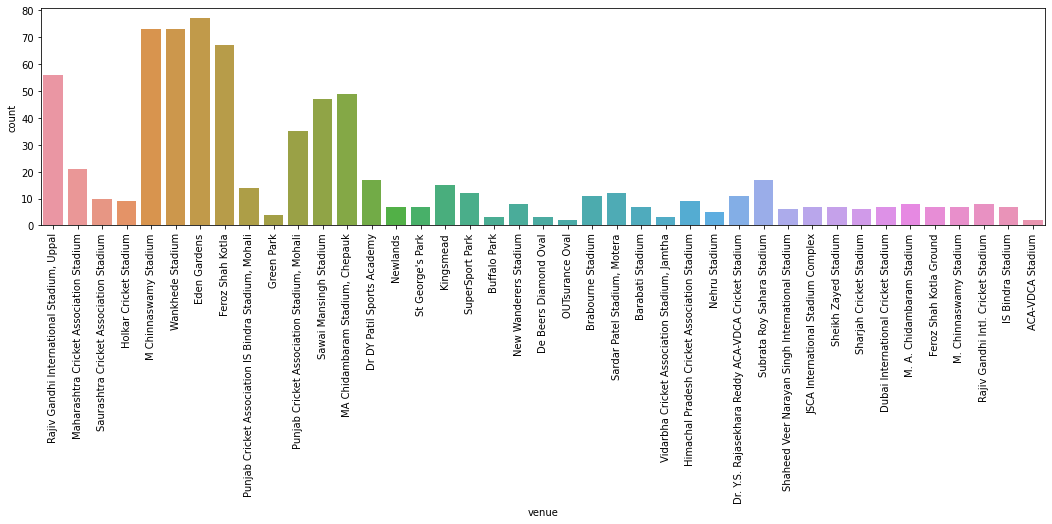

In [105]:
plt.figure(figsize=(18,4))
sns.countplot(x='venue', data=df)
plt.xticks(rotation='vertical')
plt.show()

Highest number of matches are played in Eden Gardens

### City which hosted most watches

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

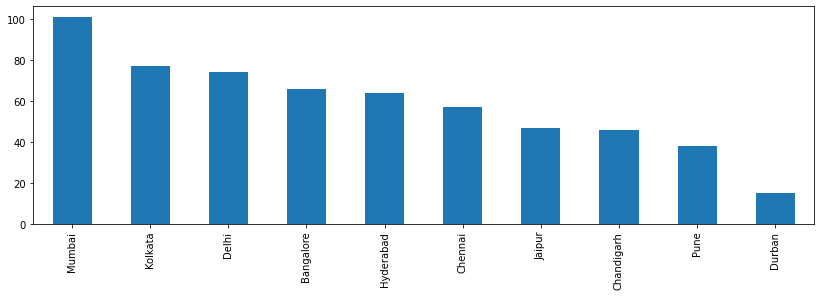

In [114]:
plt.figure(figsize= (14,4))
df['city'].value_counts().head(10).plot.bar()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

Most matches are played in mumbai city

### Number of wins per team

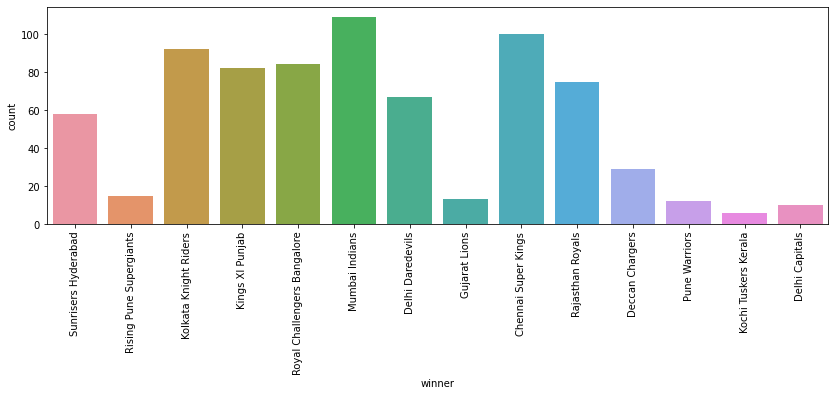

In [106]:
plt.figure(figsize=(14,4))
sns.countplot(x = 'winner',data =df)
plt.xticks(rotation = 'vertical')

plt.show()

### Toss winning with Match winning

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Toss winning with match winning')

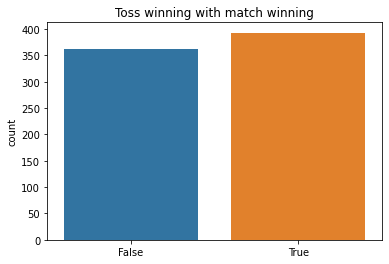

In [107]:
sns.countplot(df['toss_winner'] == df['winner'])
plt.title("Toss winning with match winning")
              

If the team wins the toss, chances of team winning the match gets increased

### Decision taken after winning the toss

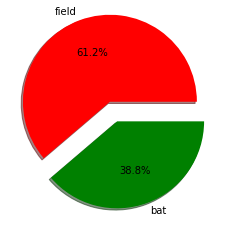

In [108]:
toss_decision = df['toss_decision'].value_counts()
color =['Red','Green']
myexplode = [0.2,0.04]
plt.pie(toss_decision,labels=toss_decision.index,explode=myexplode,shadow = True,colors=color,autopct='%1.1f%%')
plt.show()

There are 61.2% chance of choosing the fielding after winning the toss and 38.8% to choose batting respectively

### Championships per team

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


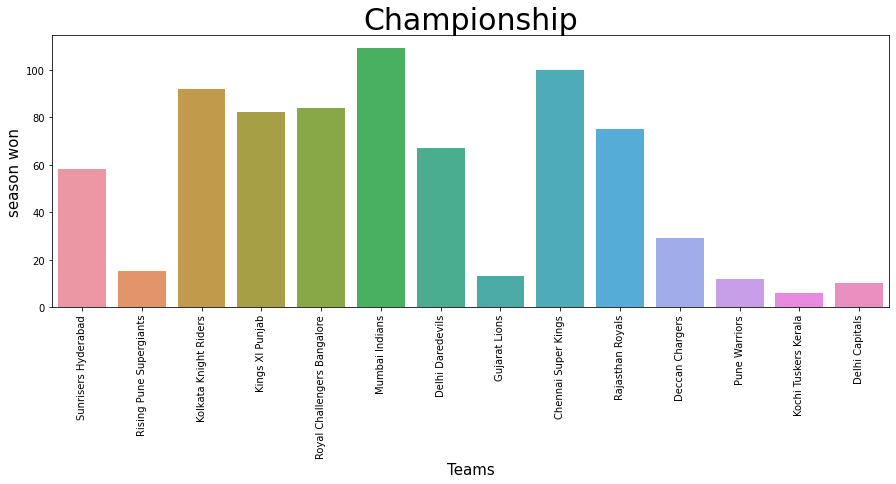

In [175]:
plt.subplots(figsize=(15,5))
sns.countplot('winner',data = df )
plt.title('Championship', fontsize =30)
plt.xlabel('Teams' , fontsize = 15)
plt.ylabel('season won' , fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.show()

### Most matches won by teams per season

In [112]:
for i in range(2008,2020):
  mat = df[df['season'] == i] ['winner'].value_counts().head(2)
  print(f'Season {i} { mat.index[0]} won most matches : {mat[0]}')

Season 2008 Rajasthan Royals won most matches : 13
Season 2009 Delhi Daredevils won most matches : 10
Season 2010 Mumbai Indians won most matches : 11
Season 2011 Chennai Super Kings won most matches : 11
Season 2012 Kolkata Knight Riders won most matches : 12
Season 2013 Mumbai Indians won most matches : 13
Season 2014 Kings XI Punjab won most matches : 12
Season 2015 Chennai Super Kings won most matches : 10
Season 2016 Sunrisers Hyderabad won most matches : 11
Season 2017 Mumbai Indians won most matches : 12
Season 2018 Chennai Super Kings won most matches : 11
Season 2019 Mumbai Indians won most matches : 11


### Total Super overs

In [133]:
print(f"Total super overs : {df1['is_super_over'].value_counts()[1]}")

Total super overs : 81


### Most successfull in super overs

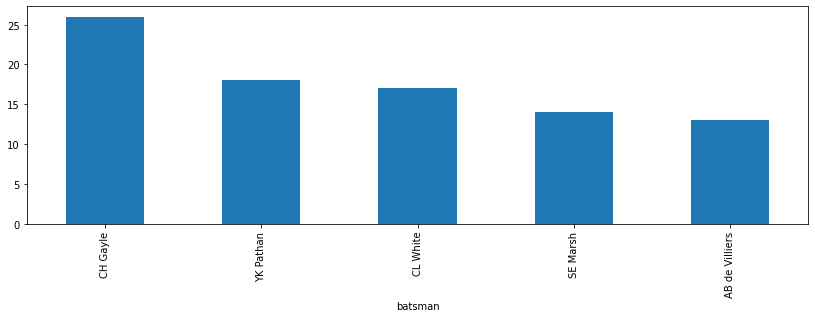

In [139]:
super_overs = df1[df1['is_super_over'] == 1].groupby('batsman')['total_runs'].sum().sort_values(ascending = False).head()
super_overs.plot(kind = 'bar' , figsize = (14,4))

Chris Gayle is most destructive batsmen in super over with max runs

### Most successful in super overs in terms of wickets

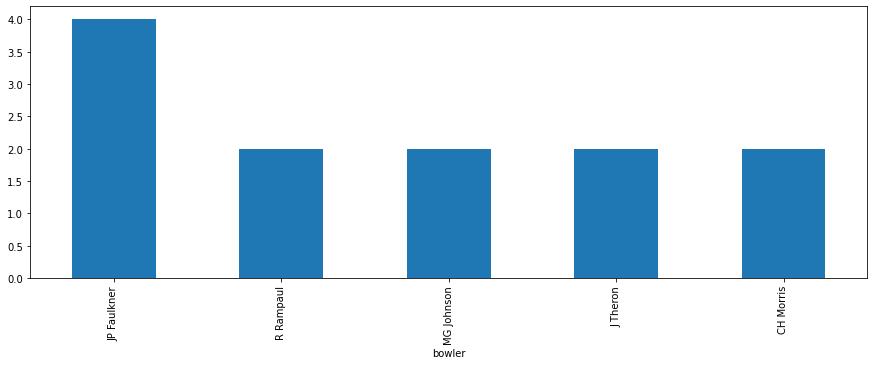

In [170]:
super_overs = df1[(df1['is_super_over'] == 1) & (df1['player_dismissed'].notnull())].groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head()
super_overs.plot(kind='bar',figsize=(15, 5))

JP Faulkner is most difficult bowler to face in Super Over.

#### Players with most 4s 

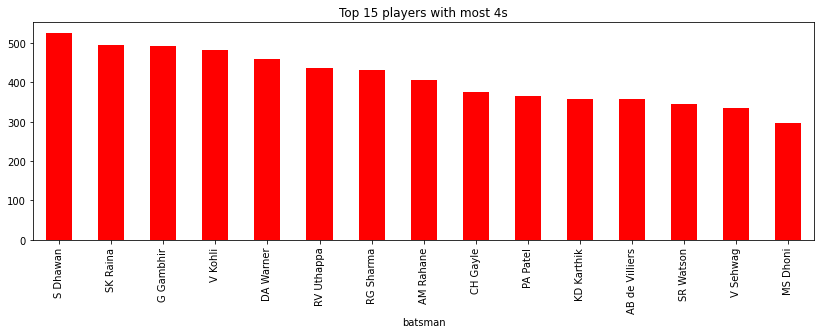

In [171]:
df1[df1['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count().sort_values(ascending = False).head(15).plot(kind='bar', title='Top 15 players with most 4s', figsize=(14,4), color='red')

#### Players with most 6s 

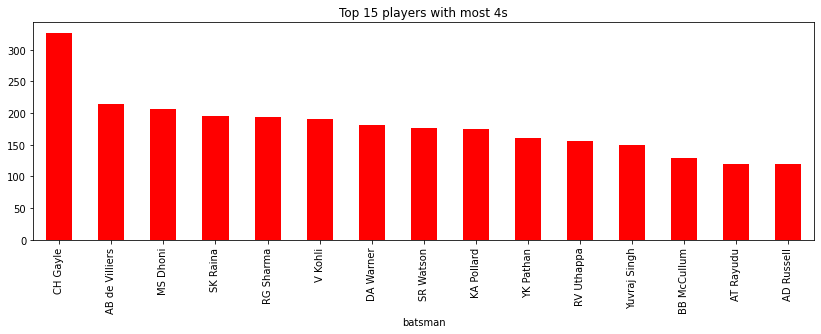

In [172]:
df1[df1['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count().sort_values(ascending = False).head(15).plot(kind='bar', title='Top 15 players with most 4s', figsize=(14,4), color='red')

Shikhar Dhawan - most number of fours in IPL history.

Chirs Gayle - most number of sixes in IPL history.


Thank You